<a href="https://colab.research.google.com/github/bennyantony2500/blog/blob/main/Untitled40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [ ]:
th=pd.read_csv('tamil_news_train.csv')
tht=pd.read_csv('tamil_news_test.csv')

In [ ]:
th

NewsInEnglish  ... CategoryInTamil
0      2017/May/19941-miss-iraq-competition-after-43-...  ...           உலகம்
1      2018/Dec/55921-viswasam-s-rustic-folk-song-has...  ...          சினிமா
2      2018/Dec/55929-inspector-who-bought-insurance-...  ...       தமிழ்நாடு
3                2017/Jan/16161-morarji-desai-budget.txt  ...         இந்தியா
4      2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...  ...          சினிமா
...                                                  ...  ...             ...
14516  2018/Apr/43310-karnataka-assembly-elections-20...  ...         அரசியல்
14517  2017/Dec/38185-the-police-made-elaborate-arran...  ...       தமிழ்நாடு
14518  2018/Jun/47685-chennai-hdfc-customer-money-the...  ...       தமிழ்நாடு
14519  2018/Aug/49520-pv-sindhu-settles-for-second-su...  ...         இந்தியா
14520  2018/May/45978-tamil-nadu-deputy-cm-o-panneers...  ...       தமிழ்நாடு

[14521 rows x 4 columns]

In [ ]:
th['NewsInTamil']

0               ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி
1        இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...
2        சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...
3                    பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்
4        “நானா? பாஜகவில் இணைந்துவிட்டேனா” - வரலட்சுமி வ...
                               ...                        
14516    ‘மோடி கூட்டத்தில் கலகம் செய்யுங்கள்’: ஜிக்னேஷ்...
14517    புத்தாண்டு கொண்டாட்டம்: சென்னையில் 3,500 போலீச...
14518                 ‘இரும்புத்திரை’ பட பாணியில் திருட்டு
14519       தங்க மங்கை பி.வி.சிந்துவின் சாதனைக் களங்கள் ! 
14520    துப்பாக்கிச் சூடு சம்பவம் நெஞ்சை உருக்குகிறது:...
Name: NewsInTamil, Length: 14521, dtype: object

In [ ]:
th['Category'].value_counts()

tamilnadu    5028
india        3443
cinema       2050
sports       1701
politics     1200
world        1099
Name: Category, dtype: int64

In [ ]:
tht['Category'].value_counts()

tamilnadu    1219
india         925
cinema        485
sports        439
politics      287
world         276
Name: Category, dtype: int64

In [ ]:
tnc = th[th['Category']=='tamilnadu']
inc = th[th['Category']=='india']
cic=th[th['Category']=='cinema']
sic=th[th['Category']=='sports']
pic=th[th['Category']=='politics']
wic=th[th['Category']=='world']

In [ ]:
tnctext = " ".join(tnc.NewsInTamil.to_numpy().tolist())#makes paragraph of NewsInTamil tamil nadu rows
inctext = " ".join(inc.NewsInTamil.to_numpy().tolist())
cictext = " ".join(cic.NewsInTamil.to_numpy().tolist())
sictext = " ".join(sic.NewsInTamil.to_numpy().tolist())
pictext = " ".join(pic.NewsInTamil.to_numpy().tolist())
wictext = " ".join(wic.NewsInTamil.to_numpy().tolist())

In [ ]:
tnctext

'சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த காவல் ஆய்வாளர் தொடரும் பஸ் கட்டண உயர்வு: தினசரி, மாதாந்திர பாஸ்-ம் காலி! செம்மரம் வெட்டச் சென்றதாக திருப்பதியில் தமிழர்கள் கைது பஸ் ஸ்டிரைக்: மெட்ரோ ரயிலில் குவிந்த சென்னை மக்கள் ஜெயலலிதா நினைவிடத்தில் அஞ்சலி செலுத்தியவர் மாரடைப்பால் மரணம்... சிபிஐ சோதனை நிறைவு.. சிதம்பரம் வீடுகளில் சிக்கியது என்ன..? நடந்தது விபத்தா? படுகொலையா?: சயானிடம் விசாரணை தீவிரம் போலீஸ் வேலை: ஹால் டிக்கெட்கள் ரெடி தருமபுரியில் கடுமையான பனிப் பொழிவு : வாகன ஓட்டிகள் அவதி மன்னார்குடியில் அமோகமாக மது விற்பனை: கண்டுகொள்ளாத காவல்துறை நியாயவிலைக் கடை ஊழியர்கள் இன்று முதல் வேலைநிறுத்தம் 18 எம்.எல்.ஏக்கள் தகுதி நீக்க வழக்கு - காலை 10.30 மணிக்கு தீர்ப்பு ! ஆசிரியருக்கு மசாஜ் செய்யும் மாணவன்; வைரலாகும் வீடியோ\xa0 கருணாநிதி நலம் குறித்து விசாரிக்க நடிகர் விஜய் காவேரி மருத்துவமனை வருகை எம்ஜிஆர், கருணாநிதி நட்பை ஸ்டாலின் மறக்கக்கூடாது - தம்பிதுரை அழைப்பு துப்பாக்கிச்சூடு : தூத்துக்குடி துணை வட்டாட்சியர்கள் பணியிடமாற்றம் ஆற்றில் பொங்கும் நுரை: காரணம் புரியாமல் மக்கள் அவதி அம்மா உணவக

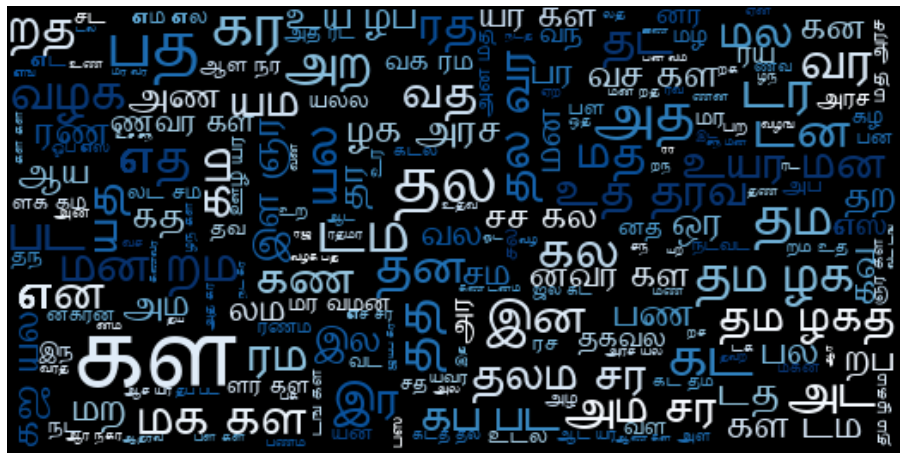

In [ ]:
tn_cloud = WordCloud(font_path='TSCu_SaiIndira.ttf',width =520, height =260,max_font_size=50, background_color ="black", colormap='Blues').generate(tnctext)
plt.figure(figsize=(16,10))
plt.imshow(tn_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()


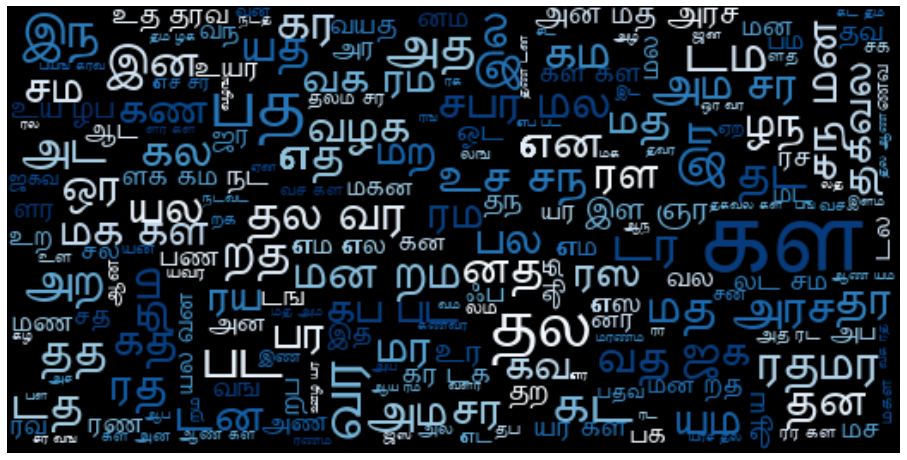

In [ ]:
in_cloud = WordCloud(font_path='TSCu_SaiIndira.ttf',width =520, height =260,max_font_size=50, background_color ="black", colormap='Blues').generate(inctext)
plt.figure(figsize=(16,10))
plt.imshow(in_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()


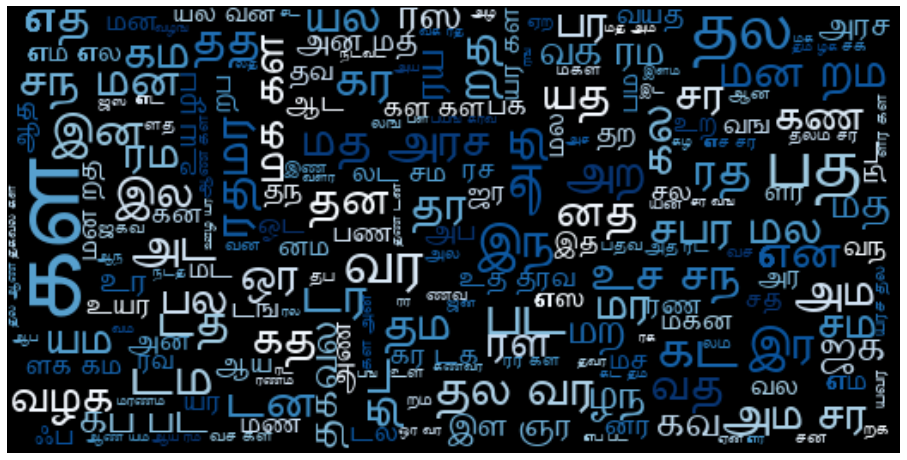

In [ ]:
in_cloud = WordCloud(font_path='TSCu_SaiIndira.ttf',width =520, height =260,max_font_size=50, background_color ="black", colormap='Blues').generate(inctext)
plt.figure(figsize=(16,10))
plt.imshow(in_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

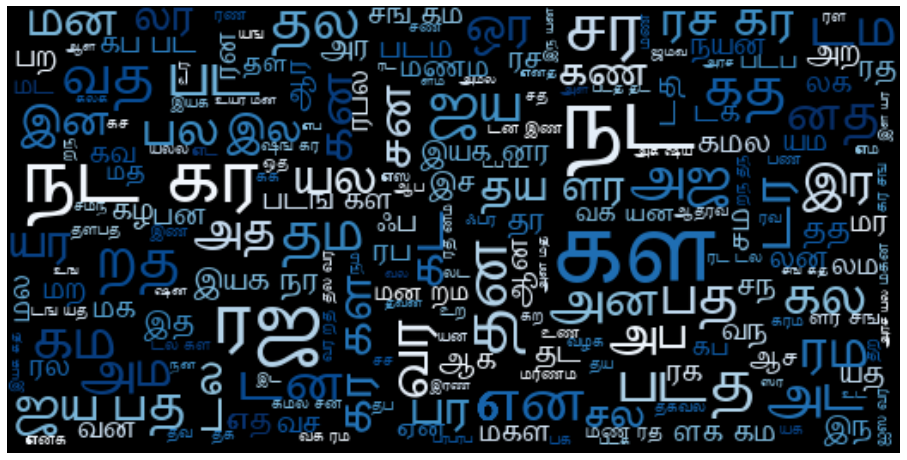

In [ ]:
ci_cloud = WordCloud(font_path='TSCu_SaiIndira.ttf',width =520, height =260,max_font_size=50, background_color ="black", colormap='Blues').generate(cictext)
plt.figure(figsize=(16,10))
plt.imshow(ci_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()


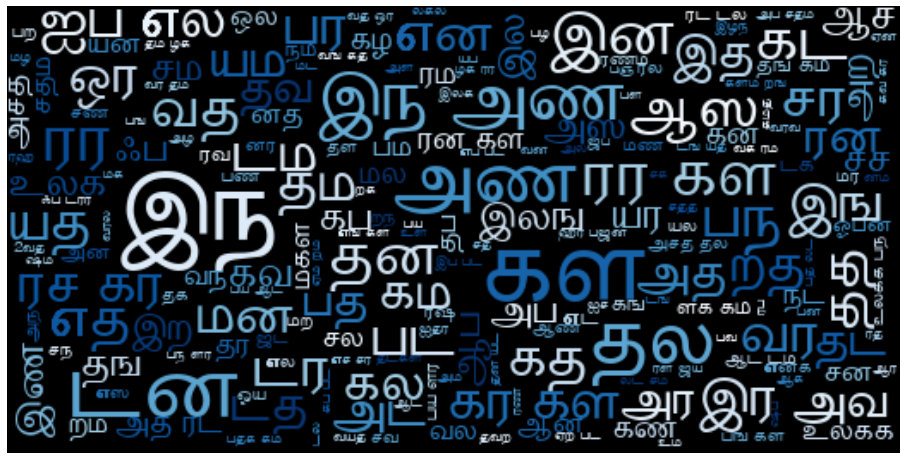

In [ ]:
si_cloud = WordCloud(font_path='TSCu_SaiIndira.ttf',width =520, height =260,max_font_size=50, background_color ="black", colormap='Blues').generate(sictext)
plt.figure(figsize=(16,10))
plt.imshow(si_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

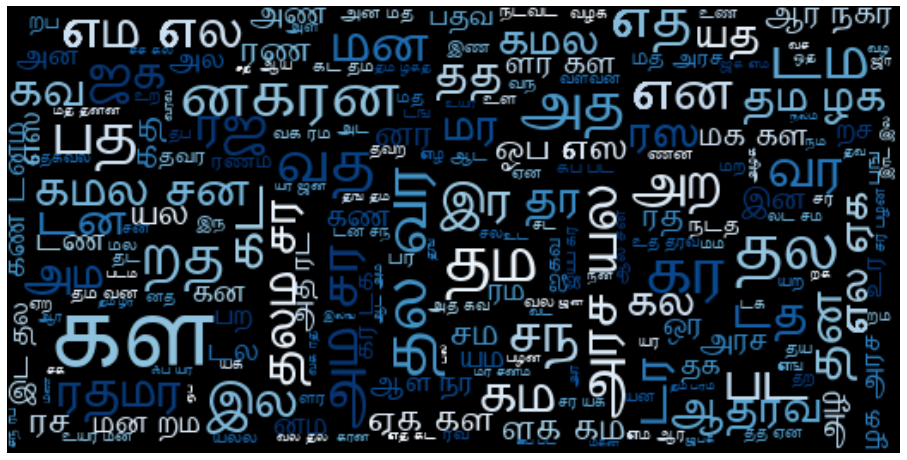

In [ ]:
pi_cloud = WordCloud(font_path='TSCu_SaiIndira.ttf',width =520, height =260,max_font_size=50, background_color ="black", colormap='Blues').generate(pictext)
plt.figure(figsize=(16,10))
plt.imshow(pi_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

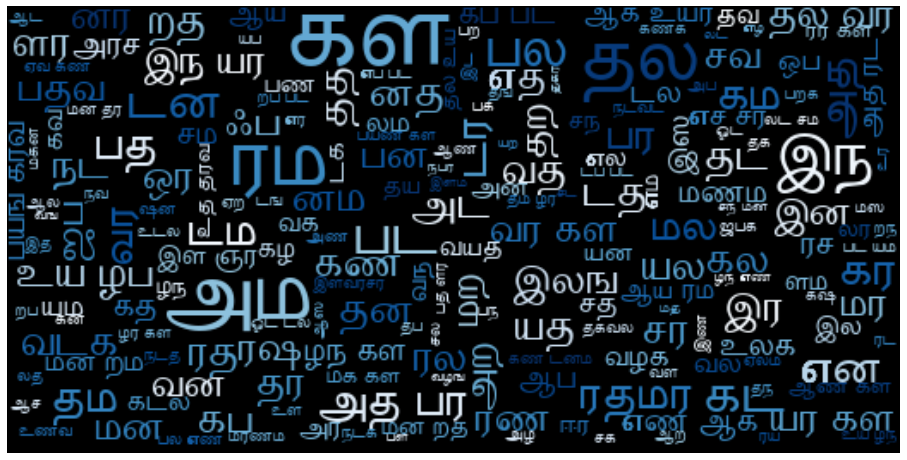

In [ ]:
wi_cloud = WordCloud(font_path='TSCu_SaiIndira.ttf',width =520, height =260,max_font_size=50, background_color ="black", colormap='Blues').generate(wictext)
plt.figure(figsize=(16,10))
plt.imshow(wi_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [ ]:
th

NewsInEnglish  ... CategoryInTamil
0      2017/May/19941-miss-iraq-competition-after-43-...  ...           உலகம்
1      2018/Dec/55921-viswasam-s-rustic-folk-song-has...  ...          சினிமா
2      2018/Dec/55929-inspector-who-bought-insurance-...  ...       தமிழ்நாடு
3                2017/Jan/16161-morarji-desai-budget.txt  ...         இந்தியா
4      2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...  ...          சினிமா
...                                                  ...  ...             ...
14516  2018/Apr/43310-karnataka-assembly-elections-20...  ...         அரசியல்
14517  2017/Dec/38185-the-police-made-elaborate-arran...  ...       தமிழ்நாடு
14518  2018/Jun/47685-chennai-hdfc-customer-money-the...  ...       தமிழ்நாடு
14519  2018/Aug/49520-pv-sindhu-settles-for-second-su...  ...         இந்தியா
14520  2018/May/45978-tamil-nadu-deputy-cm-o-panneers...  ...       தமிழ்நாடு

[14521 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


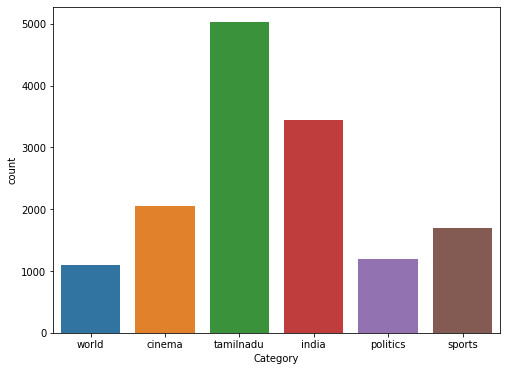

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(th.Category	)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


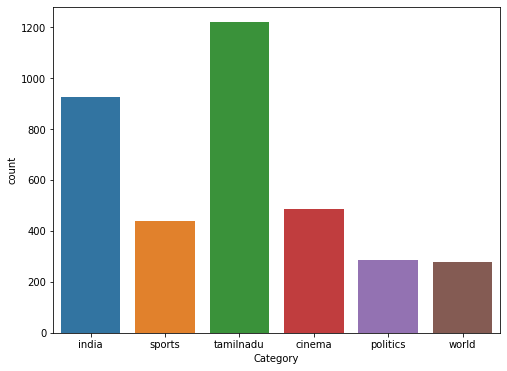

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(tht.Category	)

In [ ]:
th

NewsInEnglish  ... CategoryInTamil
0      2017/May/19941-miss-iraq-competition-after-43-...  ...           உலகம்
1      2018/Dec/55921-viswasam-s-rustic-folk-song-has...  ...          சினிமா
2      2018/Dec/55929-inspector-who-bought-insurance-...  ...       தமிழ்நாடு
3                2017/Jan/16161-morarji-desai-budget.txt  ...         இந்தியா
4      2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...  ...          சினிமா
...                                                  ...  ...             ...
14516  2018/Apr/43310-karnataka-assembly-elections-20...  ...         அரசியல்
14517  2017/Dec/38185-the-police-made-elaborate-arran...  ...       தமிழ்நாடு
14518  2018/Jun/47685-chennai-hdfc-customer-money-the...  ...       தமிழ்நாடு
14519  2018/Aug/49520-pv-sindhu-settles-for-second-su...  ...         இந்தியா
14520  2018/May/45978-tamil-nadu-deputy-cm-o-panneers...  ...       தமிழ்நாடு

[14521 rows x 4 columns]

In [ ]:
mvpu=[]


In [ ]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
# Removing punctuations in string
# Using loop + punctuation string
for test_str in tht.NewsInTamil:
  for ele in test_str:
    if ele in punc:
      test_str = test_str.replace(ele, "")
  mvpu.append(test_str)
tht['mvpu']=mvpu

In [ ]:
mcpu=[]

In [ ]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
# Removing punctuations in string
# Using loop + punctuation string
for test_str in th.NewsInTamil:
  for ele in test_str:
    if ele in punc:
      test_str = test_str.replace(ele, "")
  mcpu.append(test_str)
th['mcpu']=mcpu

In [ ]:
th

NewsInEnglish  ...                                               mcpu
0      2017/May/19941-miss-iraq-competition-after-43-...  ...         ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி
1      2018/Dec/55921-viswasam-s-rustic-folk-song-has...  ...  இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...
2      2018/Dec/55929-inspector-who-bought-insurance-...  ...  சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...
3                2017/Jan/16161-morarji-desai-budget.txt  ...              பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்
4      2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...  ...  “நானா பாஜகவில் இணைந்துவிட்டேனா”  வரலட்சுமி விள...
...                                                  ...  ...                                                ...
14516  2018/Apr/43310-karnataka-assembly-elections-20...  ...  ‘மோடி கூட்டத்தில் கலகம் செய்யுங்கள்’ ஜிக்னேஷ் ...
14517  2017/Dec/38185-the-police-made-elaborate-arran...  ...  புத்தாண்டு கொண்டாட்டம் சென்னையில் 3500 போலீசார...
14518  2018/Jun/47685-chennai-hdfc-customer-money-the...  ...               ‘இரும்புத்திரை’ பட பாணியில் திருட்டு
14519  2018/Aug/49520-pv-sindhu-settles-for-second-su...  ...        தங்க மங்கை பிவிசிந்துவின் சாதனைக் களங்கள்  
14520  2018/May/45978-tamil-nadu-deputy-cm-o-panneers...  ...  துப்பாக்கிச் சூடு சம்பவம் நெஞ்சை உருக்குகிறது ...

[14521 rows x 5 columns]

In [ ]:
tht

NewsInEnglish  ...                                               mvpu
0     2017/Jun/21972-groom-chewing-gutka-during-wedd...  ...  தாலி கட்ற நேரத்துலயும் குட்காவா மணமகனை உதறினார...
1     2018/Nov/54005-indvswi-3rd-t20-west-indies-won...  ...  3வது டி20  வெஸ்ட் இண்டீஸ் முதல் பேட்டிங்  வாஷி...
2     2018/Dec/55960-lkg-ukg-classes-will-be-started...  ...  பெற்றோர்கள் விருப்பத்திற்கு ஏற்ப எல்கேஜி யுகேஜ...
3     2018/Mar/41755-college-student-murder-in-chenn...  ...      சென்னையில் கல்லூரி வாசலில் மாணவி குத்திக்கொலை
4     2018/Sep/51691-fever-in-uttar-pradesh-71-child...  ...  உபியில் காய்ச்சலால் 45 நாட்களில் 71 குழந்தைகள்...
...                                                 ...  ...                                                ...
3626  2018/Oct/52110-govt-owes-air-india-over-rs-114...  ...  விஐபிகள் பயணம் ஏர் இந்தியாவுக்கு மத்திய அரசு ர...
3627  2018/Dec/55702-gangsters-open-fire-at-kochi-be...  ...  நடிகையின் பியூட்டி பார்லரில் துப்பாக்கிச் சூடு...
3628  2018/Dec/56010-uae-based-indian-girl-planned-t...  ...  போட்டோ ட்ரோல் ஆனதால் விரக்தி  நேரலையில் இளம்பெ...
3629  2018/Oct/52539-aims-issue-vijayabaskar-to-meet...  ...  எய்ம்ஸ் விவகாரம் மத்திய அமைச்சரை சந்திக்கிறார்...
3630  2017/Oct/33345-srilankan-politicians-should-wa...  ...  அரசியல்வாதிகள் மெர்சல் படம் பார்க்க வேண்டும் இ...

[3631 rows x 5 columns]

In [ ]:
tht

NewsInEnglish  ...                                               mvpu
0     2017/Jun/21972-groom-chewing-gutka-during-wedd...  ...  தாலி கட்ற நேரத்துலயும் குட்காவா மணமகனை உதறினார...
1     2018/Nov/54005-indvswi-3rd-t20-west-indies-won...  ...  3வது டி20  வெஸ்ட் இண்டீஸ் முதல் பேட்டிங்  வாஷி...
2     2018/Dec/55960-lkg-ukg-classes-will-be-started...  ...  பெற்றோர்கள் விருப்பத்திற்கு ஏற்ப எல்கேஜி யுகேஜ...
3     2018/Mar/41755-college-student-murder-in-chenn...  ...      சென்னையில் கல்லூரி வாசலில் மாணவி குத்திக்கொலை
4     2018/Sep/51691-fever-in-uttar-pradesh-71-child...  ...  உபியில் காய்ச்சலால் 45 நாட்களில் 71 குழந்தைகள்...
...                                                 ...  ...                                                ...
3626  2018/Oct/52110-govt-owes-air-india-over-rs-114...  ...  விஐபிகள் பயணம் ஏர் இந்தியாவுக்கு மத்திய அரசு ர...
3627  2018/Dec/55702-gangsters-open-fire-at-kochi-be...  ...  நடிகையின் பியூட்டி பார்லரில் துப்பாக்கிச் சூடு...
3628  2018/Dec/56010-uae-based-indian-girl-planned-t...  ...  போட்டோ ட்ரோல் ஆனதால் விரக்தி  நேரலையில் இளம்பெ...
3629  2018/Oct/52539-aims-issue-vijayabaskar-to-meet...  ...  எய்ம்ஸ் விவகாரம் மத்திய அமைச்சரை சந்திக்கிறார்...
3630  2017/Oct/33345-srilankan-politicians-should-wa...  ...  அரசியல்வாதிகள் மெர்சல் படம் பார்க்க வேண்டும் இ...

[3631 rows x 5 columns]

In [ ]:
tn=[]
ind=[]
cin=[]
sp=[]
pol=[]
wo=[]

In [ ]:
for i in th['Category']:
  if i=='tamilnadu':
    tn.append(1)
    ind.append(0)
    cin.append(0)
    sp.append(0)
    pol.append(0)
    wo.append(0)
  elif i=='india':
    tn.append(0)
    ind.append(1)
    cin.append(0)
    sp.append(0)
    pol.append(0)
    wo.append(0)
  elif i=='cinema':
    tn.append(0)
    ind.append(0)
    cin.append(1)
    sp.append(0)
    pol.append(0)
    wo.append(0)
  elif i=='sports':
    tn.append(0)
    ind.append(0)
    cin.append(0)
    sp.append(1)
    pol.append(0)
    wo.append(0)
  elif i=='politics':
    tn.append(0)
    ind.append(0)
    cin.append(0)
    sp.append(0)
    pol.append(1)
    wo.append(0)
  else:
    
    tn.append(0)
    ind.append(0)
    cin.append(0)
    sp.append(0)
    pol.append(0)
    wo.append(1)


In [ ]:
th['tn']=tn
th['ind']=ind
th['cin']=cin
th['sp']=sp
th['pol']=pol
th['wo']=wo

In [ ]:
th

NewsInEnglish  ... wo
0      2017/May/19941-miss-iraq-competition-after-43-...  ...  1
1      2018/Dec/55921-viswasam-s-rustic-folk-song-has...  ...  0
2      2018/Dec/55929-inspector-who-bought-insurance-...  ...  0
3                2017/Jan/16161-morarji-desai-budget.txt  ...  0
4      2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...  ...  0
...                                                  ...  ... ..
14516  2018/Apr/43310-karnataka-assembly-elections-20...  ...  0
14517  2017/Dec/38185-the-police-made-elaborate-arran...  ...  0
14518  2018/Jun/47685-chennai-hdfc-customer-money-the...  ...  0
14519  2018/Aug/49520-pv-sindhu-settles-for-second-su...  ...  0
14520  2018/May/45978-tamil-nadu-deputy-cm-o-panneers...  ...  0

[14521 rows x 11 columns]

In [ ]:
tnn=[]
indn=[]
cinn=[]
spn=[]
poln=[]
won=[]

In [ ]:
for i in tht['Category']:
  if i=='tamilnadu':
    tnn.append(1)
    indn.append(0)
    cinn.append(0)
    spn.append(0)
    poln.append(0)
    won.append(0)
  elif i=='india':
    tnn.append(0)
    indn.append(1)
    cinn.append(0)
    spn.append(0)
    poln.append(0)
    won.append(0)
  elif i=='cinema':
    tnn.append(0)
    indn.append(0)
    cinn.append(1)
    spn.append(0)
    poln.append(0)
    won.append(0)
  elif i=='sports':
    tnn.append(0)
    indn.append(0)
    cinn.append(0)
    spn.append(1)
    poln.append(0)
    won.append(0)
  elif i=='politics':
    tnn.append(0)
    indn.append(0)
    cinn.append(0)
    spn.append(0)
    poln.append(1)
    won.append(0)
  else:
    tnn.append(0)
    indn.append(0)
    cinn.append(0)
    spn.append(0)
    poln.append(0)
    won.append(1)

In [ ]:
tht['tn']=tnn
tht['ind']=indn
tht['cin']=cinn
tht['sp']=spn
tht['pol']=poln
tht['wo']=won

In [ ]:
tht

NewsInEnglish  ... wo
0     2017/Jun/21972-groom-chewing-gutka-during-wedd...  ...  0
1     2018/Nov/54005-indvswi-3rd-t20-west-indies-won...  ...  0
2     2018/Dec/55960-lkg-ukg-classes-will-be-started...  ...  0
3     2018/Mar/41755-college-student-murder-in-chenn...  ...  0
4     2018/Sep/51691-fever-in-uttar-pradesh-71-child...  ...  0
...                                                 ...  ... ..
3626  2018/Oct/52110-govt-owes-air-india-over-rs-114...  ...  0
3627  2018/Dec/55702-gangsters-open-fire-at-kochi-be...  ...  0
3628  2018/Dec/56010-uae-based-indian-girl-planned-t...  ...  1
3629  2018/Oct/52539-aims-issue-vijayabaskar-to-meet...  ...  0
3630  2017/Oct/33345-srilankan-politicians-should-wa...  ...  1

[3631 rows x 11 columns]

In [ ]:
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 5000

In [ ]:
tokenize = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenize.fit_on_texts(th.mcpu)

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
word_index = tokenize.word_index
word_index

{'<OOV>': 1,
 'அரசு': 2,
 'மீது': 3,
 'பேர்': 4,
 'கைது': 5,
 'இன்று': 6,
 'மத்திய': 7,
 'தமிழக': 8,
 'இந்திய': 9,
 'புதிய': 10,
 'வழக்கு': 11,
 'அமைச்சர்': 12,
 'புகார்': 13,
 'பிரதமர்': 14,
 'மீண்டும்': 15,
 'ஒரு': 16,
 'பாலியல்': 17,
 'முதல்': 18,
 'நடிகர்': 19,
 'நாளை': 20,
 'விவகாரம்': 21,
 'தடை': 22,
 'மோடி': 23,
 'போராட்டம்': 24,
 'பெண்': 25,
 'முதலமைச்சர்': 26,
 'ஸ்டாலின்': 27,
 'மக்கள்': 28,
 'உத்தரவு': 29,
 'விளக்கம்': 30,
 'தகவல்': 31,
 'பலி': 32,
 '2': 33,
 'உயிரிழப்பு': 34,
 'வேண்டும்': 35,
 'தேர்தல்': 36,
 'என்ன': 37,
 'பாஜக': 38,
 'வீடியோ': 39,
 'இல்லை': 40,
 'அறிவிப்பு': 41,
 'ஏன்': 42,
 'கோடி': 43,
 'இந்தியா': 44,
 'அணி': 45,
 'இருந்து': 46,
 '3': 47,
 'போலீஸ்': 48,
 'நடிகை': 49,
 'லட்சம்': 50,
 'விசாரணை': 51,
 'கேள்வி': 52,
 'விஜய்': 53,
 'முதல்வர்': 54,
 'சென்னை': 55,
 'உயர்நீதிமன்றம்': 56,
 'வெற்றி': 57,
 'செய்ய': 58,
 'கிரிக்கெட்': 59,
 'அதிரடி': 60,
 '5': 61,
 'தற்கொலை': 62,
 'விபத்து': 63,
 'புயல்': 64,
 'நீதிமன்றம்': 65,
 'மனு': 66,
 'கோலி': 67,
 '\xa0': 68,
 'ச

In [ ]:
training_sequenc = tokenize.texts_to_sequences(th.mcpu)
training_padd = pad_sequences (training_sequenc, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequenc = tokenize.texts_to_sequences(tht.mvpu)
testing_padd = pad_sequences(testing_sequenc, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [ ]:
training_padd

array([[   1, 2227,  432, ...,    0,    0,    0],
       [   9,  818, 1427, ...,    0,    0,    0],
       [ 767, 3029, 1108, ...,    0,    0,    0],
       ...,
       [   1,  415, 1429, ...,    0,    0,    0],
       [ 492,    1,    1, ...,    0,    0,    0],
       [ 496,  478,  422, ...,    0,    0,    0]], dtype=int32)

In [ ]:
training_padd.shape

(14521, 50)

In [ ]:
testing_padd.shape

(3631, 50)

In [ ]:
vocab_s = 5000
embed_dim = 16
drp_vale = 0.2 
n_dense = 24

In [ ]:
predict_msg1=['சென்னையில் பெண் கொல்லப்பட்டார்']
predict_msg2=['டெல்லியில் பூகம்பம்']
predict_msg3=['நடிகர் போதைப்பொருள் பயன்படுத்தி பிடிபட்டார்']
predict_msg4=['கால்பந்து ரசிகர்களை இழந்து வருகிறது']
predict_msg5=['சுயேச்சை அமைச்சரை டிஸ்மிஸ்']
predict_msg6=['மலேசிய விமானம் காணவில்லை']

In [ ]:
model = Sequential()
model.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drp_vale))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padd, th['tn'], epochs=num_epochs, validation_data=(testing_padd, tht['tn']), verbose=2)

Epoch 1/50
454/454 - 2s - loss: 0.6479 - accuracy: 0.6516 - val_loss: 0.6294 - val_accuracy: 0.6643
Epoch 2/50
454/454 - 1s - loss: 0.6020 - accuracy: 0.6776 - val_loss: 0.5288 - val_accuracy: 0.7293
Epoch 3/50
454/454 - 1s - loss: 0.4325 - accuracy: 0.8105 - val_loss: 0.4146 - val_accuracy: 0.8028
Epoch 4/50
454/454 - 1s - loss: 0.3347 - accuracy: 0.8581 - val_loss: 0.3844 - val_accuracy: 0.8273
Epoch 5/50
454/454 - 1s - loss: 0.2914 - accuracy: 0.8785 - val_loss: 0.3733 - val_accuracy: 0.8400
Epoch 6/50
454/454 - 1s - loss: 0.2616 - accuracy: 0.8937 - val_loss: 0.3708 - val_accuracy: 0.8458
Epoch 7/50
454/454 - 1s - loss: 0.2375 - accuracy: 0.9052 - val_loss: 0.3743 - val_accuracy: 0.8496
Epoch 8/50
454/454 - 1s - loss: 0.2199 - accuracy: 0.9148 - val_loss: 0.3832 - val_accuracy: 0.8403
Epoch 9/50
454/454 - 1s - loss: 0.2068 - accuracy: 0.9192 - val_loss: 0.3824 - val_accuracy: 0.8543
Epoch 10/50
454/454 - 1s - loss: 0.1938 - accuracy: 0.9265 - val_loss: 0.3907 - val_accuracy: 0.8507

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

In [ ]:
predict_msg=['சென்னையில் பெண் கொல்லப்பட்டார்']

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))

In [ ]:
predict_spam(predict_msg1)

array([[0.9999995]], dtype=float32)

In [ ]:
predict_spam(predict_msg2)

array([[0.00336024]], dtype=float32)

In [ ]:
predict_spam(predict_msg3)

array([[0.06987604]], dtype=float32)

In [ ]:
predict_spam(predict_msg4)

array([[4.6305798e-12]], dtype=float32)

In [ ]:
predict_spam(predict_msg5)

array([[1.7702102e-15]], dtype=float32)

In [ ]:
predict_spam(predict_msg6)

array([[1.269599e-07]], dtype=float32)

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

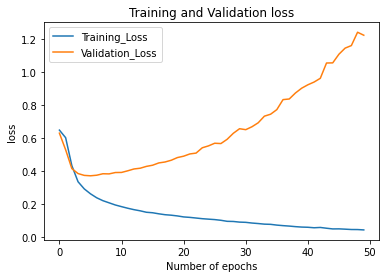

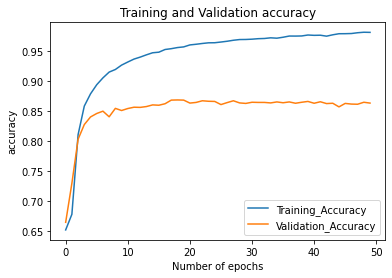

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
n_lstm = 20
drop_lstm =0.2

In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padd, th['tn'], epochs=num_epochs, validation_data=(testing_padd, tht['tn']), verbose=2)

Epoch 1/50
454/454 - 21s - loss: 0.5738 - accuracy: 0.7063 - val_loss: 0.4299 - val_accuracy: 0.8048
Epoch 2/50
454/454 - 16s - loss: 0.3445 - accuracy: 0.8565 - val_loss: 0.3909 - val_accuracy: 0.8329
Epoch 3/50
454/454 - 16s - loss: 0.2793 - accuracy: 0.8879 - val_loss: 0.3839 - val_accuracy: 0.8382
Epoch 4/50
454/454 - 16s - loss: 0.2459 - accuracy: 0.9035 - val_loss: 0.4073 - val_accuracy: 0.8369
Epoch 5/50
Epoch 6/50
454/454 - 16s - loss: 0.2034 - accuracy: 0.9193 - val_loss: 0.4192 - val_accuracy: 0.8402
Epoch 7/50
454/454 - 16s - loss: 0.1894 - accuracy: 0.9244 - val_loss: 0.4333 - val_accuracy: 0.8440
Epoch 8/50
454/454 - 16s - loss: 0.1805 - accuracy: 0.9262 - val_loss: 0.4328 - val_accuracy: 0.8457
Epoch 9/50
454/454 - 16s - loss: 0.1695 - accuracy: 0.9303 - val_loss: 0.4773 - val_accuracy: 0.8399
Epoch 10/50
454/454 - 16s - loss: 0.1612 - accuracy: 0.9316 - val_loss: 0.4783 - val_accuracy: 0.8472
Epoch 11/50
454/454 - 16s - loss: 0.1570 - accuracy: 0.9320 - val_loss: 0.4721 

In [ ]:
predict_msg

['சென்னையில் பெண் கொல்லப்பட்டார்']

In [ ]:
def predict_spam1(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model1.predict(padded))

In [ ]:
predict_spam1(predict_msg1)

array([[[0.94415355],
        [0.9868386 ],
        [0.9952303 ],
        [0.99726754],
        [0.9979675 ],
        [0.99833596],
        [0.9985863 ],
        [0.9987695 ],
        [0.9989039 ],
        [0.99900043],
        [0.99906707],
        [0.9991107 ],
        [0.99913657],
        [0.99914837],
        [0.9991486 ],
        [0.9991388 ],
        [0.99911904],
        [0.9990892 ],
        [0.99904835],
        [0.9989956 ],
        [0.9989301 ],
        [0.998852  ],
        [0.99876225],
        [0.99866265],
        [0.9985554 ],
        [0.99844325],
        [0.9983286 ],
        [0.9982147 ],
        [0.9981051 ],
        [0.99800366],
        [0.9979141 ],
        [0.99783874],
        [0.997779  ],
        [0.9977349 ],
        [0.99770534],
        [0.9976887 ],
        [0.9976829 ],
        [0.9976851 ],
        [0.9976915 ],
        [0.9976975 ],
        [0.99769783],
        [0.99768806],
        [0.9976662 ],
        [0.99763215],
        [0.9975889 ],
        [0

In [ ]:
np.average(predict_spam1(predict_msg1))

0.99687606

In [ ]:
print(np.average(predict_spam1(predict_msg1)))
print(np.average(predict_spam1(predict_msg2)))
print(np.average(predict_spam1(predict_msg3)))
print(np.average(predict_spam1(predict_msg4)))
print(np.average(predict_spam1(predict_msg5)))
print(np.average(predict_spam1(predict_msg6)))


0.99687606
0.020653453
0.010870541
0.0015044338
0.010275746
0.0012914705


In [ ]:
predict_msg2=['டெல்லியில் பூகம்பம்']

In [ ]:
predict_spam1(predict_msg2)

array([[[0.20457765],
        [0.16689584],
        [0.1264809 ],
        [0.09674144],
        [0.07536748],
        [0.06472635],
        [0.06367558],
        [0.06865516],
        [0.07371169],
        [0.07581347],
        [0.07624489],
        [0.07640925],
        [0.07669842],
        [0.07712415],
        [0.07764378],
        [0.07822603],
        [0.07885292],
        [0.07951447],
        [0.08020467],
        [0.08091918],
        [0.081655  ],
        [0.08240959],
        [0.08318064],
        [0.08396646],
        [0.08476573],
        [0.08557722],
        [0.08640012],
        [0.08723366],
        [0.0880774 ],
        [0.08893093],
        [0.08979413],
        [0.0906668 ],
        [0.09154886],
        [0.0924404 ],
        [0.09334144],
        [0.09425199],
        [0.09517226],
        [0.0961023 ],
        [0.09704229],
        [0.09799236],
        [0.09895268],
        [0.09992343],
        [0.10090476],
        [0.10189679],
        [0.10289976],
        [0

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])


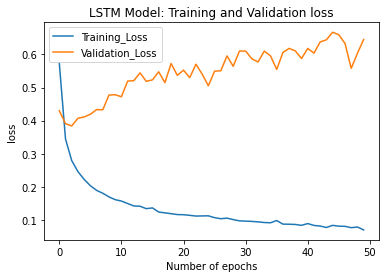

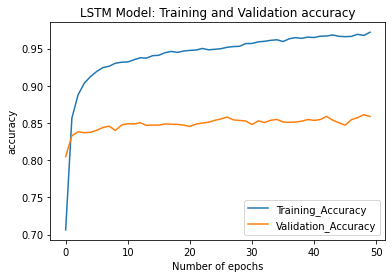

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model22 = Sequential()
model22.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model22.add(GlobalAveragePooling1D())
model22.add(Dense(24, activation='relu'))
model22.add(Dropout(drp_vale))
model22.add(Dense(1, activation='sigmoid'))
model22.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
history2 = model22.fit(training_padd, th['ind'], epochs=num_epochs, validation_data=(testing_padd, tht['ind']), verbose=2)

Epoch 1/50
454/454 - 2s - loss: 0.5860 - accuracy: 0.7504 - val_loss: 0.5621 - val_accuracy: 0.7452
Epoch 2/50
454/454 - 1s - loss: 0.5427 - accuracy: 0.7629 - val_loss: 0.5516 - val_accuracy: 0.7452
Epoch 3/50
454/454 - 1s - loss: 0.4926 - accuracy: 0.7691 - val_loss: 0.4527 - val_accuracy: 0.7750
Epoch 4/50
454/454 - 1s - loss: 0.3617 - accuracy: 0.8413 - val_loss: 0.3687 - val_accuracy: 0.8350
Epoch 5/50
454/454 - 1s - loss: 0.2878 - accuracy: 0.8829 - val_loss: 0.3493 - val_accuracy: 0.8444
Epoch 6/50
454/454 - 1s - loss: 0.2487 - accuracy: 0.9012 - val_loss: 0.3434 - val_accuracy: 0.8521
Epoch 7/50
454/454 - 1s - loss: 0.2250 - accuracy: 0.9102 - val_loss: 0.3375 - val_accuracy: 0.8502
Epoch 8/50
454/454 - 1s - loss: 0.2062 - accuracy: 0.9200 - val_loss: 0.3381 - val_accuracy: 0.8554
Epoch 9/50
454/454 - 1s - loss: 0.1889 - accuracy: 0.9281 - val_loss: 0.3433 - val_accuracy: 0.8590
Epoch 10/50
454/454 - 1s - loss: 0.1746 - accuracy: 0.9335 - val_loss: 0.3515 - val_accuracy: 0.8615

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model22.predict(padded))

In [ ]:
predict_spam(predict_msg)

array([[1.13629606e-10]], dtype=float32)

In [ ]:
print(predict_spam(predict_msg1))
print(predict_spam(predict_msg2))
print(predict_spam(predict_msg3))
print(predict_spam(predict_msg4))
print(predict_spam(predict_msg5))
print(predict_spam(predict_msg6))

[[1.6516062e-09]]
[[0.99982506]]
[[0.00176194]]
[[9.001602e-12]]
[[0.9761529]]
[[4.2399247e-08]]


In [ ]:
metrics = pd.DataFrame(history2.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

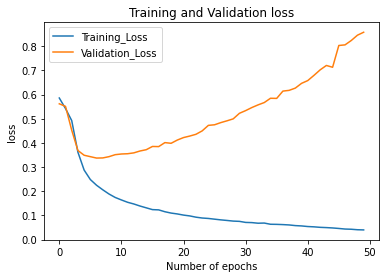

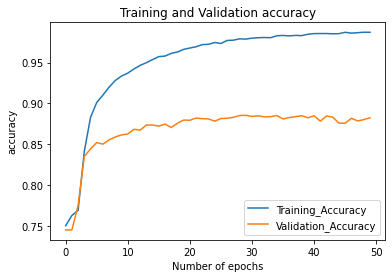

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model12 = Sequential()
model12.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model12.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model12.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model12.add(Dense(1, activation='sigmoid'))
model12.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history22 = model12.fit(training_padd, th['ind'], epochs=num_epochs, validation_data=(testing_padd, tht['ind']), verbose=2)

Epoch 1/50
454/454 - 20s - loss: 0.5267 - accuracy: 0.7757 - val_loss: 0.4158 - val_accuracy: 0.8173
Epoch 2/50
454/454 - 16s - loss: 0.3195 - accuracy: 0.8696 - val_loss: 0.4188 - val_accuracy: 0.8343
Epoch 3/50
454/454 - 16s - loss: 0.2520 - accuracy: 0.9031 - val_loss: 0.3692 - val_accuracy: 0.8453
Epoch 4/50
454/454 - 16s - loss: 0.2145 - accuracy: 0.9184 - val_loss: 0.3731 - val_accuracy: 0.8568
Epoch 5/50
454/454 - 16s - loss: 0.1913 - accuracy: 0.9267 - val_loss: 0.3711 - val_accuracy: 0.8616
Epoch 6/50
454/454 - 16s - loss: 0.1728 - accuracy: 0.9354 - val_loss: 0.3897 - val_accuracy: 0.8646
Epoch 7/50
454/454 - 16s - loss: 0.1630 - accuracy: 0.9374 - val_loss: 0.4010 - val_accuracy: 0.8687
Epoch 8/50
454/454 - 16s - loss: 0.1508 - accuracy: 0.9429 - val_loss: 0.4150 - val_accuracy: 0.8670
Epoch 9/50
454/454 - 16s - loss: 0.1484 - accuracy: 0.9426 - val_loss: 0.4056 - val_accuracy: 0.8658
Epoch 10/50
454/454 - 16s - loss: 0.1345 - accuracy: 0.9484 - val_loss: 0.4605 - val_accura

In [ ]:
def predict_spam1(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model12.predict(padded))

In [ ]:

print(np.average(predict_spam1(predict_msg1)))
print(np.average(predict_spam1(predict_msg2)))
print(np.average(predict_spam1(predict_msg3)))
print(np.average(predict_spam1(predict_msg4)))
print(np.average(predict_spam1(predict_msg5)))
print(np.average(predict_spam1(predict_msg6)))

0.00087005255
0.98273313
0.0019089794
0.0007906705
0.053644694
0.0009531397


In [ ]:
metrics = pd.DataFrame(history22.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

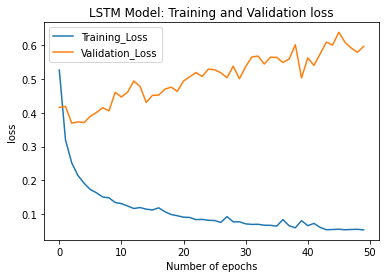

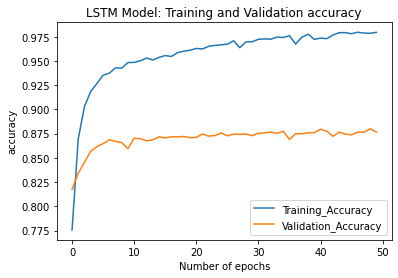

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model33 = Sequential()
model33.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model33.add(GlobalAveragePooling1D())
model33.add(Dense(24, activation='relu'))
model33.add(Dropout(drp_vale))
model33.add(Dense(1, activation='sigmoid'))
model33.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
history3 = model33.fit(training_padd, th['cin'], epochs=num_epochs, validation_data=(testing_padd, tht['cin']), verbose=2)

Epoch 1/50
454/454 - 2s - loss: 0.4362 - accuracy: 0.8580 - val_loss: 0.3848 - val_accuracy: 0.8664
Epoch 2/50
454/454 - 1s - loss: 0.3847 - accuracy: 0.8588 - val_loss: 0.3495 - val_accuracy: 0.8664
Epoch 3/50
454/454 - 1s - loss: 0.2942 - accuracy: 0.8694 - val_loss: 0.2393 - val_accuracy: 0.9055
Epoch 4/50
454/454 - 1s - loss: 0.1742 - accuracy: 0.9360 - val_loss: 0.1728 - val_accuracy: 0.9306
Epoch 5/50
454/454 - 1s - loss: 0.1242 - accuracy: 0.9554 - val_loss: 0.1508 - val_accuracy: 0.9452
Epoch 6/50
454/454 - 1s - loss: 0.0986 - accuracy: 0.9660 - val_loss: 0.1487 - val_accuracy: 0.9444
Epoch 7/50
454/454 - 1s - loss: 0.0835 - accuracy: 0.9714 - val_loss: 0.1391 - val_accuracy: 0.9477
Epoch 8/50
454/454 - 1s - loss: 0.0731 - accuracy: 0.9762 - val_loss: 0.1500 - val_accuracy: 0.9485
Epoch 9/50
454/454 - 1s - loss: 0.0652 - accuracy: 0.9789 - val_loss: 0.1513 - val_accuracy: 0.9499
Epoch 10/50
454/454 - 1s - loss: 0.0576 - accuracy: 0.9809 - val_loss: 0.1357 - val_accuracy: 0.9485

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model33.predict(padded))

In [ ]:
print(predict_spam(predict_msg1))
print(predict_spam(predict_msg2))
print(predict_spam(predict_msg3))
print(predict_spam(predict_msg4))
print(predict_spam(predict_msg5))
print(predict_spam(predict_msg6))

[[0.00399926]]
[[2.394346e-07]]
[[0.97711945]]
[[0.00056344]]
[[4.098575e-14]]
[[0.00204128]]


In [ ]:
metrics = pd.DataFrame(history3.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

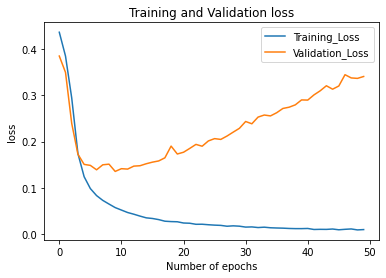

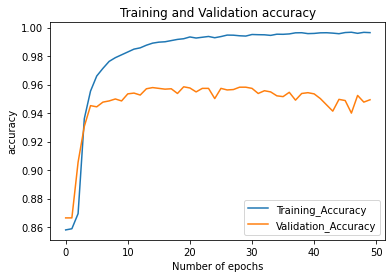

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model13 = Sequential()
model13.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model13.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model13.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model13.add(Dense(1, activation='sigmoid'))
model13.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history3 = model13.fit(training_padd, th['cin'], epochs=num_epochs, validation_data=(testing_padd, tht['cin']), verbose=2)

Epoch 1/50
454/454 - 20s - loss: 0.4023 - accuracy: 0.8531 - val_loss: 0.2674 - val_accuracy: 0.8665
Epoch 2/50
454/454 - 16s - loss: 0.2135 - accuracy: 0.9255 - val_loss: 0.2152 - val_accuracy: 0.9308
Epoch 3/50
454/454 - 16s - loss: 0.1360 - accuracy: 0.9589 - val_loss: 0.1868 - val_accuracy: 0.9426
Epoch 4/50
454/454 - 16s - loss: 0.0989 - accuracy: 0.9696 - val_loss: 0.1694 - val_accuracy: 0.9446
Epoch 5/50
454/454 - 16s - loss: 0.0828 - accuracy: 0.9738 - val_loss: 0.1720 - val_accuracy: 0.9459
Epoch 6/50
454/454 - 16s - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.1731 - val_accuracy: 0.9480
Epoch 7/50
454/454 - 16s - loss: 0.0669 - accuracy: 0.9786 - val_loss: 0.1921 - val_accuracy: 0.9486
Epoch 8/50
454/454 - 16s - loss: 0.0626 - accuracy: 0.9800 - val_loss: 0.1945 - val_accuracy: 0.9477
Epoch 9/50
454/454 - 16s - loss: 0.0580 - accuracy: 0.9814 - val_loss: 0.1851 - val_accuracy: 0.9507
Epoch 10/50
454/454 - 16s - loss: 0.0585 - accuracy: 0.9807 - val_loss: 0.1723 - val_accura

In [ ]:
def predict_spam1(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model13.predict(padded))

In [ ]:
print(np.average(predict_spam1(predict_msg1)))
print(np.average(predict_spam1(predict_msg2)))
print(np.average(predict_spam1(predict_msg3)))
print(np.average(predict_spam1(predict_msg4)))
print(np.average(predict_spam1(predict_msg5)))
print(np.average(predict_spam1(predict_msg6)))

0.0025591075
3.710009e-05
0.9914946
0.00011309798
0.0036622202
9.095994e-05


In [ ]:
metrics = pd.DataFrame(history3.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

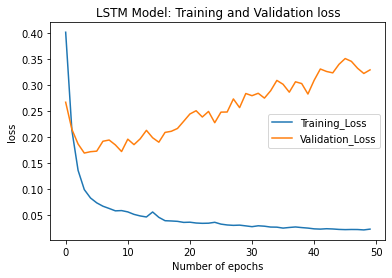

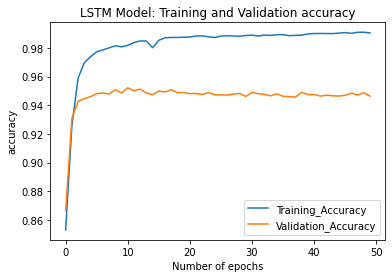

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model44 = Sequential()
model44.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model44.add(GlobalAveragePooling1D())
model44.add(Dense(24, activation='relu'))
model44.add(Dropout(drp_vale))
model44.add(Dense(1, activation='sigmoid'))
model44.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
history4 = model44.fit(training_padd, th['sp'], epochs=num_epochs, validation_data=(testing_padd, tht['sp']), verbose=2)

Epoch 1/50
454/454 - 2s - loss: 0.4155 - accuracy: 0.8760 - val_loss: 0.3550 - val_accuracy: 0.8791
Epoch 2/50
454/454 - 1s - loss: 0.3437 - accuracy: 0.8829 - val_loss: 0.3220 - val_accuracy: 0.8791
Epoch 3/50
454/454 - 1s - loss: 0.2525 - accuracy: 0.8984 - val_loss: 0.1808 - val_accuracy: 0.9287
Epoch 4/50
454/454 - 1s - loss: 0.1354 - accuracy: 0.9537 - val_loss: 0.1112 - val_accuracy: 0.9656
Epoch 5/50
454/454 - 1s - loss: 0.0882 - accuracy: 0.9720 - val_loss: 0.0872 - val_accuracy: 0.9716
Epoch 6/50
454/454 - 1s - loss: 0.0658 - accuracy: 0.9793 - val_loss: 0.0770 - val_accuracy: 0.9741
Epoch 7/50
454/454 - 1s - loss: 0.0535 - accuracy: 0.9820 - val_loss: 0.0684 - val_accuracy: 0.9785
Epoch 8/50
454/454 - 1s - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0650 - val_accuracy: 0.9818
Epoch 9/50
454/454 - 1s - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0617 - val_accuracy: 0.9804
Epoch 10/50
454/454 - 1s - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0605 - val_accuracy: 0.9807

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model44.predict(padded))

In [ ]:
print(predict_spam(predict_msg1))
print(predict_spam(predict_msg2))
print(predict_spam(predict_msg3))
print(predict_spam(predict_msg4))
print(predict_spam(predict_msg5))
print(predict_spam(predict_msg6))

[[7.620439e-06]]
[[8.306973e-07]]
[[5.3192945e-08]]
[[0.99997866]]
[[4.380599e-09]]
[[5.061608e-09]]


In [ ]:
metrics = pd.DataFrame(history4.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

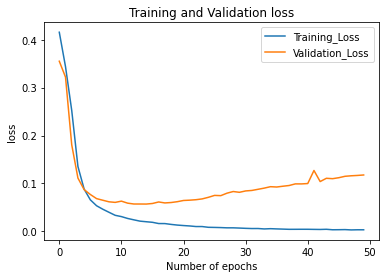

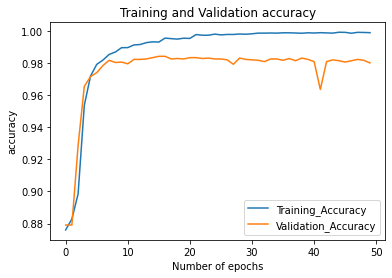

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model14 = Sequential()
model14.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model14.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model14.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model14.add(Dense(1, activation='sigmoid'))
model14.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history4 = model14.fit(training_padd, th['sp'], epochs=num_epochs, validation_data=(testing_padd, tht['sp']), verbose=2)

Epoch 1/50
454/454 - 20s - loss: 0.3503 - accuracy: 0.8944 - val_loss: 0.1882 - val_accuracy: 0.9435
Epoch 2/50
454/454 - 16s - loss: 0.1386 - accuracy: 0.9621 - val_loss: 0.1227 - val_accuracy: 0.9636
Epoch 3/50
454/454 - 16s - loss: 0.0933 - accuracy: 0.9750 - val_loss: 0.1894 - val_accuracy: 0.9458
Epoch 4/50
454/454 - 16s - loss: 0.0622 - accuracy: 0.9821 - val_loss: 0.1011 - val_accuracy: 0.9727
Epoch 5/50
454/454 - 16s - loss: 0.0499 - accuracy: 0.9834 - val_loss: 0.1033 - val_accuracy: 0.9708
Epoch 6/50
454/454 - 16s - loss: 0.0597 - accuracy: 0.9815 - val_loss: 0.1176 - val_accuracy: 0.9654
Epoch 7/50
454/454 - 15s - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.1144 - val_accuracy: 0.9746
Epoch 8/50
Epoch 9/50
454/454 - 16s - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.1029 - val_accuracy: 0.9724
Epoch 10/50
454/454 - 16s - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0958 - val_accuracy: 0.9751
Epoch 11/50
454/454 - 16s - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.1266 

In [ ]:
def predict_spam1(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model14.predict(padded))

In [ ]:
print(np.average(predict_spam1(predict_msg1)))
print(np.average(predict_spam1(predict_msg2)))
print(np.average(predict_spam1(predict_msg3)))
print(np.average(predict_spam1(predict_msg4)))
print(np.average(predict_spam1(predict_msg5)))
print(np.average(predict_spam1(predict_msg6)))

0.0004114933
5.9405986e-05
6.3483436e-05
0.99671227
0.0048492686
0.008739135


In [ ]:
metrics = pd.DataFrame(history4.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

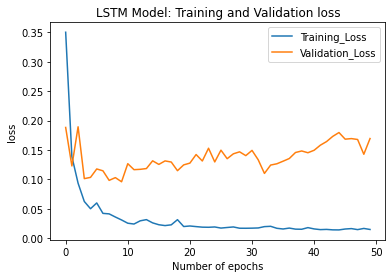

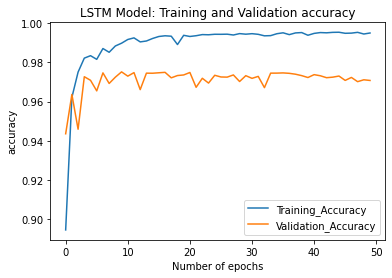

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model55 = Sequential()
model55.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model55.add(GlobalAveragePooling1D())
model55.add(Dense(24, activation='relu'))
model55.add(Dropout(drp_vale))
model55.add(Dense(1, activation='sigmoid'))
model55.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
history5 = model55.fit(training_padd, th['pol'], epochs=num_epochs, validation_data=(testing_padd, tht['pol']), verbose=2)

Epoch 1/50
454/454 - 2s - loss: 0.3549 - accuracy: 0.9129 - val_loss: 0.2724 - val_accuracy: 0.9210
Epoch 2/50
454/454 - 1s - loss: 0.2838 - accuracy: 0.9174 - val_loss: 0.2665 - val_accuracy: 0.9210
Epoch 3/50
454/454 - 1s - loss: 0.2743 - accuracy: 0.9174 - val_loss: 0.2542 - val_accuracy: 0.9210
Epoch 4/50
454/454 - 1s - loss: 0.2458 - accuracy: 0.9174 - val_loss: 0.2176 - val_accuracy: 0.9212
Epoch 5/50
454/454 - 1s - loss: 0.1833 - accuracy: 0.9255 - val_loss: 0.1813 - val_accuracy: 0.9303
Epoch 6/50
454/454 - 1s - loss: 0.1457 - accuracy: 0.9404 - val_loss: 0.1719 - val_accuracy: 0.9298
Epoch 7/50
454/454 - 1s - loss: 0.1241 - accuracy: 0.9498 - val_loss: 0.1734 - val_accuracy: 0.9323
Epoch 8/50
454/454 - 1s - loss: 0.1137 - accuracy: 0.9521 - val_loss: 0.1749 - val_accuracy: 0.9320
Epoch 9/50
454/454 - 1s - loss: 0.1040 - accuracy: 0.9588 - val_loss: 0.1745 - val_accuracy: 0.9328
Epoch 10/50
454/454 - 1s - loss: 0.0944 - accuracy: 0.9635 - val_loss: 0.1732 - val_accuracy: 0.9372

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model55.predict(padded))

In [ ]:
print(predict_spam(predict_msg1))
print(predict_spam(predict_msg2))
print(predict_spam(predict_msg3))
print(predict_spam(predict_msg4))
print(predict_spam(predict_msg5))
print(predict_spam(predict_msg6))

[[3.5335317e-09]]
[[0.00577018]]
[[4.4225042e-05]]
[[8.459441e-14]]
[[0.9999781]]
[[2.252626e-13]]


In [ ]:
metrics = pd.DataFrame(history5.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

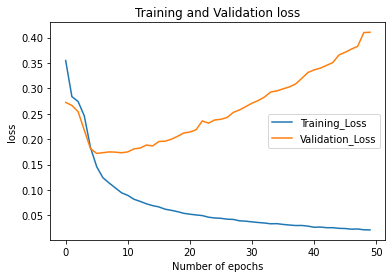

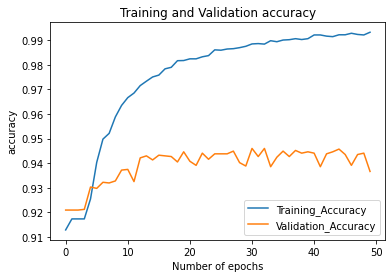

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model15 = Sequential()
model15.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model15.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model15.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model15.add(Dense(1, activation='sigmoid'))
model15.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history5 = model15.fit(training_padd, th['pol'], epochs=num_epochs, validation_data=(testing_padd, tht['pol']), verbose=2)

Epoch 1/50
454/454 - 20s - loss: 0.3212 - accuracy: 0.9142 - val_loss: 0.2802 - val_accuracy: 0.9210
Epoch 2/50
454/454 - 16s - loss: 0.2676 - accuracy: 0.9176 - val_loss: 0.2353 - val_accuracy: 0.9210
Epoch 3/50
454/454 - 16s - loss: 0.2038 - accuracy: 0.9236 - val_loss: 0.2075 - val_accuracy: 0.9292
Epoch 4/50
454/454 - 16s - loss: 0.1438 - accuracy: 0.9461 - val_loss: 0.2060 - val_accuracy: 0.9188
Epoch 5/50
454/454 - 16s - loss: 0.1183 - accuracy: 0.9564 - val_loss: 0.1905 - val_accuracy: 0.9353
Epoch 6/50
454/454 - 16s - loss: 0.1017 - accuracy: 0.9626 - val_loss: 0.1981 - val_accuracy: 0.9339
Epoch 7/50
454/454 - 15s - loss: 0.0926 - accuracy: 0.9670 - val_loss: 0.1796 - val_accuracy: 0.9402
Epoch 8/50
454/454 - 16s - loss: 0.0833 - accuracy: 0.9716 - val_loss: 0.2022 - val_accuracy: 0.9424
Epoch 9/50
454/454 - 16s - loss: 0.0740 - accuracy: 0.9752 - val_loss: 0.1969 - val_accuracy: 0.9413
Epoch 10/50
454/454 - 16s - loss: 0.0700 - accuracy: 0.9768 - val_loss: 0.1930 - val_accura

In [ ]:
def predict_spam1(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model15.predict(padded))

In [ ]:
print(np.average(predict_spam1(predict_msg1)))
print(np.average(predict_spam1(predict_msg2)))
print(np.average(predict_spam1(predict_msg3)))
print(np.average(predict_spam1(predict_msg4)))
print(np.average(predict_spam1(predict_msg5)))
print(np.average(predict_spam1(predict_msg6)))

0.000107457854
0.006909457
0.00022205472
9.626721e-05
0.98052806
0.00010899122


In [ ]:
metrics = pd.DataFrame(history5.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

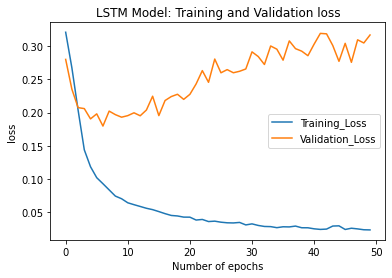

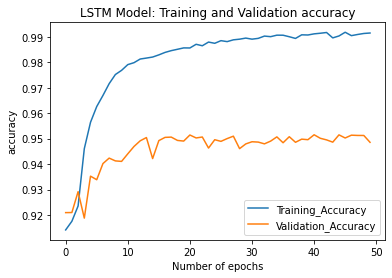

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model66 = Sequential()
model66.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model66.add(GlobalAveragePooling1D())
model66.add(Dense(24, activation='relu'))
model66.add(Dropout(drp_vale))
model66.add(Dense(1, activation='sigmoid'))
model66.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
history6 = model66.fit(training_padd, th['wo'], epochs=num_epochs, validation_data=(testing_padd, tht['wo']), verbose=2)

Epoch 1/50
454/454 - 2s - loss: 0.3373 - accuracy: 0.9243 - val_loss: 0.2656 - val_accuracy: 0.9240
Epoch 2/50
454/454 - 1s - loss: 0.2686 - accuracy: 0.9243 - val_loss: 0.2599 - val_accuracy: 0.9240
Epoch 3/50
454/454 - 1s - loss: 0.2568 - accuracy: 0.9243 - val_loss: 0.2484 - val_accuracy: 0.9240
Epoch 4/50
454/454 - 1s - loss: 0.2324 - accuracy: 0.9243 - val_loss: 0.2115 - val_accuracy: 0.9243
Epoch 5/50
454/454 - 1s - loss: 0.1608 - accuracy: 0.9367 - val_loss: 0.1566 - val_accuracy: 0.9397
Epoch 6/50
454/454 - 1s - loss: 0.1068 - accuracy: 0.9612 - val_loss: 0.1380 - val_accuracy: 0.9529
Epoch 7/50
454/454 - 1s - loss: 0.0837 - accuracy: 0.9697 - val_loss: 0.1285 - val_accuracy: 0.9570
Epoch 8/50
454/454 - 1s - loss: 0.0701 - accuracy: 0.9760 - val_loss: 0.1284 - val_accuracy: 0.9576
Epoch 9/50
454/454 - 1s - loss: 0.0609 - accuracy: 0.9788 - val_loss: 0.1245 - val_accuracy: 0.9579
Epoch 10/50
454/454 - 1s - loss: 0.0537 - accuracy: 0.9810 - val_loss: 0.1270 - val_accuracy: 0.9601

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model66.predict(padded))

In [ ]:
print(predict_spam(predict_msg1))
print(predict_spam(predict_msg2))
print(predict_spam(predict_msg3))
print(predict_spam(predict_msg4))
print(predict_spam(predict_msg5))
print(predict_spam(predict_msg6))

[[0.20973119]]
[[1.4282513e-06]]
[[0.00396818]]
[[3.532873e-08]]
[[0.00015846]]
[[0.9869958]]


In [ ]:
metrics = pd.DataFrame(history6.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

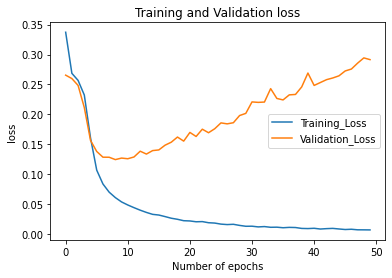

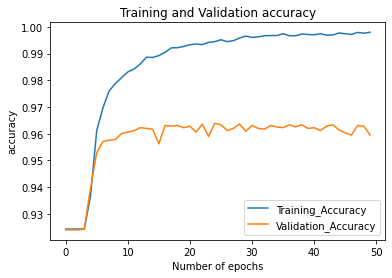

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
model16 = Sequential()
model16.add(Embedding(vocab_s, embed_dim, input_length=max_len))
model16.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model16.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model16.add(Dense(1, activation='sigmoid'))
model16.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 50
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history6 = model16.fit(training_padd, th['wo'], epochs=num_epochs, validation_data=(testing_padd, tht['wo']), verbose=2)

Epoch 1/50
454/454 - 20s - loss: 0.3001 - accuracy: 0.9241 - val_loss: 0.2753 - val_accuracy: 0.9240
Epoch 2/50
454/454 - 16s - loss: 0.2636 - accuracy: 0.9270 - val_loss: 0.2496 - val_accuracy: 0.9324
Epoch 3/50
454/454 - 16s - loss: 0.2047 - accuracy: 0.9477 - val_loss: 0.2139 - val_accuracy: 0.9429
Epoch 4/50
454/454 - 16s - loss: 0.1585 - accuracy: 0.9613 - val_loss: 0.2032 - val_accuracy: 0.9448
Epoch 5/50
454/454 - 16s - loss: 0.1293 - accuracy: 0.9681 - val_loss: 0.1675 - val_accuracy: 0.9481
Epoch 6/50
454/454 - 16s - loss: 0.1001 - accuracy: 0.9722 - val_loss: 0.1779 - val_accuracy: 0.9511
Epoch 7/50
454/454 - 16s - loss: 0.0854 - accuracy: 0.9751 - val_loss: 0.1569 - val_accuracy: 0.9548
Epoch 8/50
454/454 - 16s - loss: 0.0836 - accuracy: 0.9721 - val_loss: 0.1728 - val_accuracy: 0.9539
Epoch 9/50
454/454 - 16s - loss: 0.0880 - accuracy: 0.9677 - val_loss: 0.1845 - val_accuracy: 0.9053
Epoch 10/50
454/454 - 16s - loss: 0.0816 - accuracy: 0.9686 - val_loss: 0.1619 - val_accura

In [ ]:
def predict_spam1(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model16.predict(padded))

In [ ]:
print(np.average(predict_spam1(predict_msg1)))
print(np.average(predict_spam1(predict_msg2)))
print(np.average(predict_spam1(predict_msg3)))
print(np.average(predict_spam1(predict_msg4)))
print(np.average(predict_spam1(predict_msg5)))
print(np.average(predict_spam1(predict_msg6)))

In [ ]:
metrics = pd.DataFrame(history6.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

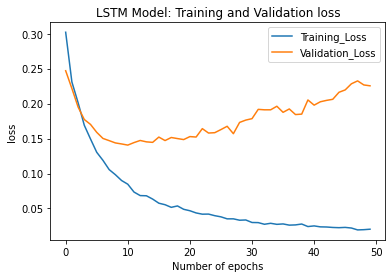

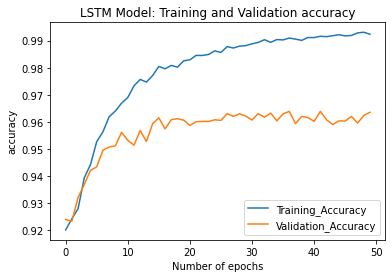

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')